# tutorial

https://mujoco.readthedocs.io/en/stable/python.html

->

https://colab.research.google.com/github/google-deepmind/mujoco/blob/main/python/tutorial.ipynb#scrollTo=m3MtIE5F1K7s


# import

In [1]:
import numpy as np
import mujoco
# mujoco.MjModel.from_xml_string('<mujoco/>')
import mediapy as media
# import subprocess
# if subprocess.run('nvidia-smi').returncode:
#   raise RuntimeError(
#       'Cannot communicate with GPU. '
#       'Make sure you are using a GPU Colab runtime. '
#       'Go to the Runtime menu and select Choose runtime type.')


# print('Setting environment variable to use GPU rendering:')
# %env MUJOCO_GL=egl

In [2]:
np.random.seed(0)

In [3]:

xml = """
<mujoco>
  <worldbody>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)


In [4]:
model.ngeom

2

In [5]:
try:
  model.geom()
except KeyError as e:
  print(e)

"Invalid name ''. Valid names: ['green_sphere', 'red_box']"


In [6]:
model.geom('green_sphere')

<_MjModelGeomViews
  bodyid: array([0])
  conaffinity: array([1])
  condim: array([3])
  contype: array([1])
  dataid: array([-1])
  friction: array([1.e+00, 5.e-03, 1.e-04])
  gap: array([0.])
  group: array([0])
  id: 1
  margin: array([0.])
  matid: array([-1])
  name: 'green_sphere'
  pos: array([0.2, 0.2, 0.2])
  priority: array([0])
  quat: array([1., 0., 0., 0.])
  rbound: array([0.1])
  rgba: array([0., 1., 0., 1.], dtype=float32)
  sameframe: array([0], dtype=uint8)
  size: array([0.1, 0. , 0. ])
  solimp: array([9.0e-01, 9.5e-01, 1.0e-03, 5.0e-01, 2.0e+00])
  solmix: array([1.])
  solref: array([0.02, 1.  ])
  type: array([2])
  user: array([], dtype=float64)
>

In [7]:
id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_GEOM, 'green_sphere')
model.geom_rgba[id, :]

array([0., 1., 0., 1.], dtype=float32)

In [8]:
print('id of "green_sphere": ', model.geom('green_sphere').id)
print('name of geom 1: ', model.geom(1).name)
print('name of body 0: ', model.body(0).name)

id of "green_sphere":  1
name of geom 1:  green_sphere
name of body 0:  world


In [9]:
[model.geom(i).name for i in range(model.ngeom)]

['red_box', 'green_sphere']

# mjData

In [10]:
data = mujoco.MjData(model)

In [11]:
print(data.geom_xpos)

[[0. 0. 0.]
 [0. 0. 0.]]


In [12]:
mujoco.mj_kinematics(model, data)
print('raw access:\n', data.geom_xpos)

# MjData also supports named access:
print('\nnamed access:\n', data.geom('green_sphere').xpos)

raw access:
 [[0.  0.  0. ]
 [0.2 0.2 0.2]]

named access:
 [0.2 0.2 0.2]


# Basic rendering, simulation, and animation

""

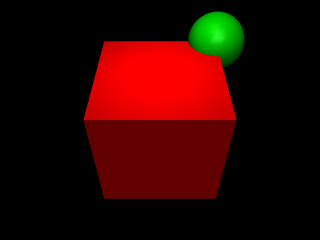

In [13]:
xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

""

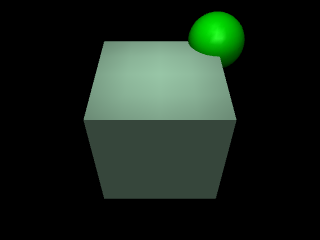

: 

In [14]:
# Run this cell multiple times for different colors
model.geom('red_box').rgba[:3] = np.random.rand(3)
renderer.update_scene(data)
media.show_image(renderer.render())

# Video

In [ ]:
duration = 3.8  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data)
    pixels = renderer.render()
    frames.append(pixels)
media.show_video(frames, fps=framerate)